In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [3]:
new_var = nltk.download('all')
new_var

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [4]:
df = pd.read_csv('NYC restaurant reviews.csv')

In [5]:
df.head()

,Title,Number of review,Catagory,Reveiw Comment,Popular food,Online Order
0,All Stars Sports Bar & Grill,21,"Bar, Pub","“The fries were terrific also, hot crisp...”",fries,Yes
1,Olio e Piu,"2,998","Italian, Pizza",“I love the food and our server Maria!”,filet mignon,Yes
2,Boucherie West Village,"1,465","French, Steakhouse",“The filet mignon was impeccable and the musse...,lobster,Yes
3,Club A Steakhouse,"4,413","American, Steakhouse",“My seafood cocktail had wonderful large lump ...,cacio e pepe,Yes
4,Piccola Cucina Estiatorio,403,"Italian, Sicilian",“penne al pomodoro and bucatini cacio e pepe w...,mussels,Yes


In [6]:
print(df.columns)

Index(['Title', 'Number of review', 'Catagory', 'Reveiw Comment',
       'Popular food', 'Online Order'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             10397 non-null  object
 1   Number of review  10397 non-null  object
 2   Catagory          10397 non-null  object
 3   Reveiw Comment    10397 non-null  object
 4   Popular food      10397 non-null  object
 5   Online Order      10397 non-null  object
dtypes: object(6)
memory usage: 487.5+ KB


In [8]:
df.shape

(10397, 6)

Exploratory Data Analysis

In [9]:
# checking for missing values
df.isnull().sum()

Title               0
Number of review    0
Catagory            0
Reveiw Comment      0
Popular food        0
Online Order        0
dtype: int64

There are not null values in this dataset.

In [10]:
print(df.dtypes)

Title               object
Number of review    object
Catagory            object
Reveiw Comment      object
Popular food        object
Online Order        object
dtype: object


In this data set, we can notice two things:
first, some misspellings in the column names, such as 'Reveiw" instead of Review and 'Catagory' instead of Category, so in the next step we are going to change that using rename() function;
second, all columns are recognized as objects (textual data types), so we need to make some small adjustments, in a way that Number of Review column should be changed into numerical. We will solve this using pd.to_numeric method.

In [11]:
# renaming misspelled columns
df = df.rename(columns={
    'Catagory': 'Category',
    'Reveiw Comment': 'Review Comment'
})
# checking if it is right now
print(df.columns)

Index(['Title', 'Number of review', 'Category', 'Review Comment',
       'Popular food', 'Online Order'],
      dtype='object')


In [12]:
# Check for non-finite values in the 'Number of review' column
non_finite_values = df['Number of review'].loc[~df['Number of review'].astype(str).str.isdigit()]
print(non_finite_values)

1        2,998
2        1,465
3        4,413
5        1,325
8        1,725
         ...  
10392       No
10393       No
10394       No
10395       No
10396       No
Name: Number of review, Length: 2528, dtype: object


After additional checks, it seemed like there were some non-finite values in the 'Number of reviews' column, so before converting it into int data type we had to fix the problem. Non-finite values could have arisen due to various reasons, such as data entry errors or inconsistencies in the dataset. These values can sometimes go undetected when checking for missing values using isnull() which happened in this case.

In [13]:
# Remove commas from the column
df['Number of review'] = df['Number of review'].str.replace(',', '')

# Convert the column to numeric, setting errors='coerce' to replace non-numeric values with NaN
df['Number of review'] = pd.to_numeric(df['Number of review'], errors='coerce')

# Fill NaN values with 0
df['Number of review'].fillna(0, inplace=True)

# Convert the column to integers
df['Number of review'] = df['Number of review'].astype(int)

# Verify the data type conversion
print(df['Number of review'].dtype)


int64


In [14]:
# Checking unique values per column
unique_values = df.nunique()
print("Unique values per column:\n", unique_values)

Unique values per column:
 Title               7237
Number of review     856
Category             560
Review Comment      6029
Popular food         539
Online Order           4
dtype: int64


In [15]:
# Find duplicates based on the combination of all columns
duplicates = df[df.duplicated()]
print(f"Number of duplicated rows: {len(duplicates)}")


Number of duplicated rows: 652


After considering what to do with the duplicates, I decided to drop them, since I want to find out the overall sentiment for NYC restaurants and by removing duplicates, I can ensure that each unique review contributes equally to the sentiment analysis, potentially leading to more accurate and reliable results.

In [16]:
# Removing duplicates
df = df.drop_duplicates()

In [17]:
# Summary statistics for categorical columns
categorical_cols = df.select_dtypes(include='object')
print(categorical_cols.describe())

               Title        Category Review Comment Popular food Online Order
count           9745            9745           9745         9745         9745
unique          7237             560           6029          539            4
top     Little Alley  Italian, Pizza             No           No           No
freq              55             722           1960         7221         5285


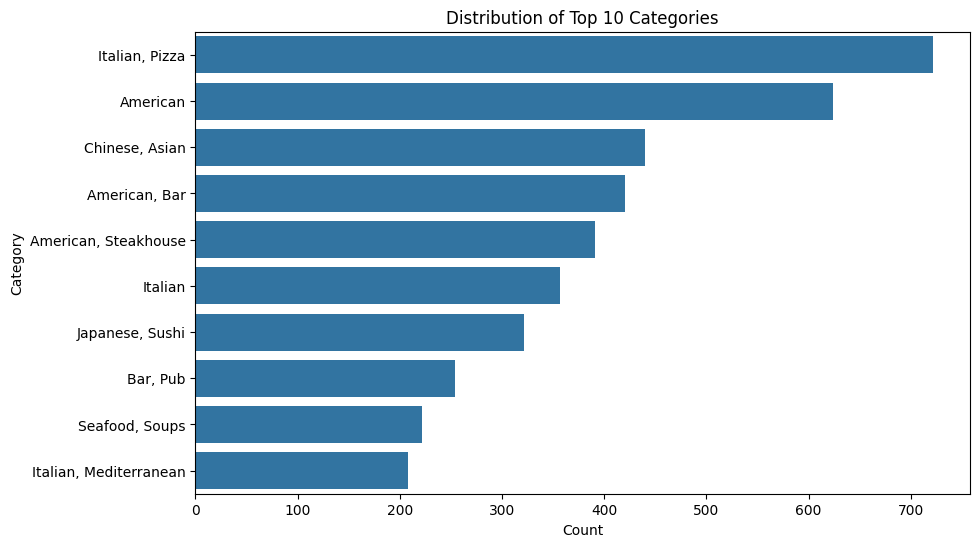

In [18]:
# Get the top 10 categories by frequency
top_categories = df['Category'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories
df_top_categories = df[df['Category'].isin(top_categories)]

# Plot the distribution of top 10 categories
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df_top_categories, order=top_categories)
plt.title('Distribution of Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

Count distribution plot specifically for the top 10 categories in the dataset.

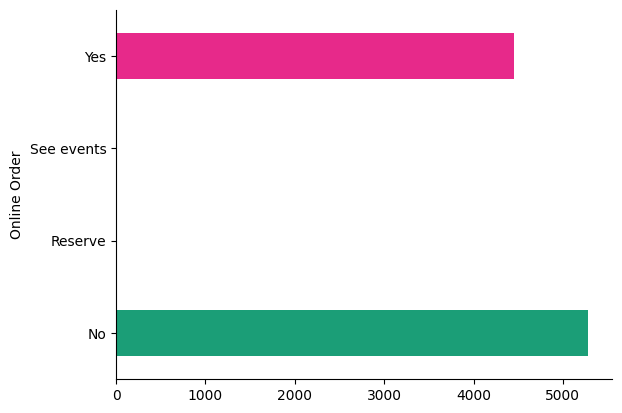

In [19]:
# Count plot for Online Order

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Online Order').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-20-51e08fd83a0b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x='Number of review', y='Online Order', palette='Dark2')


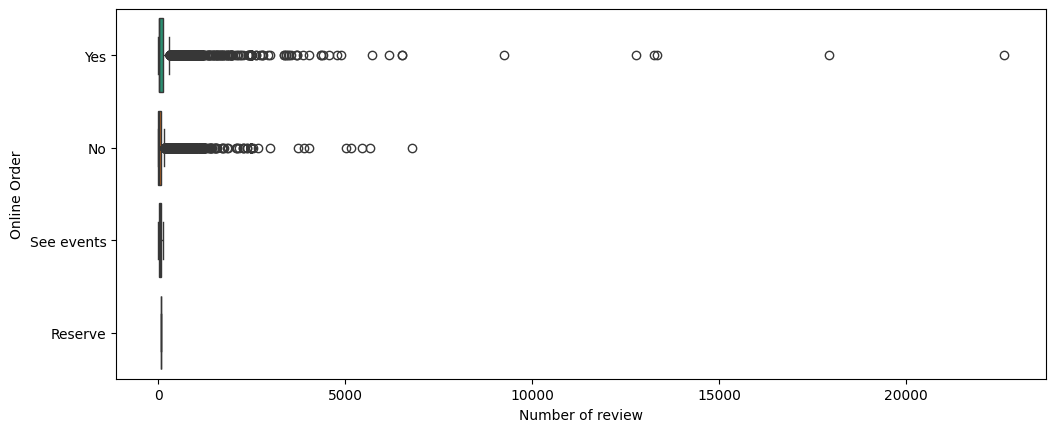

In [20]:
# Online Order vs Number of review

figsize = (12, 1.2 * len(df['Online Order'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(df, x='Number of review', y='Online Order', palette='Dark2')
sns.despine(top=False, right=False, bottom=False, left=False)

Data Preprocessing

In [21]:
df.head()

,Title,Number of review,Category,Review Comment,Popular food,Online Order
0,All Stars Sports Bar & Grill,21,"Bar, Pub","“The fries were terrific also, hot crisp...”",fries,Yes
1,Olio e Piu,2998,"Italian, Pizza",“I love the food and our server Maria!”,filet mignon,Yes
2,Boucherie West Village,1465,"French, Steakhouse",“The filet mignon was impeccable and the musse...,lobster,Yes
3,Club A Steakhouse,4413,"American, Steakhouse",“My seafood cocktail had wonderful large lump ...,cacio e pepe,Yes
4,Piccola Cucina Estiatorio,403,"Italian, Sicilian",“penne al pomodoro and bucatini cacio e pepe w...,mussels,Yes


Text Cleaning

In [22]:
import re

def clean_text(text):
    # Define characters to keep
    keep_chars = '.,\'!?"'

    # Remove unwanted characters, punctuation, and extra whitespaces
    text = ''.join(char for char in text if char.isalnum() or char in keep_chars)
    text = re.sub(r'\s+', ' ', text.strip())  # Replace multiple whitespaces with a single space
    return text

# Apply text cleaning to the 'Review Comment' column
df['Review Comment Cleaned'] = df['Review Comment'].apply(clean_text)


Lowercasing

In [23]:
# Convert text to lowercase
df['Review Comment Lowercase'] = df['Review Comment'].str.lower()

Stopword removal

In [24]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Manually download the stopwords resource
nltk.download('stopwords')

# Verify the downloaded stopwords
try:
    stop_words = set(stopwords.words('english'))
    print("Stopwords loaded successfully.")
except LookupError:
    print("Stopwords resource not found. Please check your NLTK data path.")

Stopwords loaded successfully.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Remove stopwords from the tokenized 'Review Comment' column
df['Review Comment NoStopwords'] = df['Review Comment Tokens'].apply(remove_stopwords)

In [26]:
from nltk.tokenize import word_tokenize

# Tokenize the 'Review Comment' column
df['Review Comment Tokens'] = df['Review Comment'].apply(word_tokenize)

Lemmatization and creation of a new column in the DataFrame containing the lemmatized tokens of the review comments.

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the 'Review Comment Tokens' column
df['Review Comment Lemmatized'] = df['Review Comment Tokens'].apply(lemmatize_text)

In [29]:
# Define stopwords list
stop_words = set(stopwords.words('english'))

# Remove stopwords after lemmatization
df['Review Comment Lemmatized NoStopwords'] = df['Review Comment Lemmatized'].apply(lambda x: [token for token in x if token.lower() not in stop_words])


In [30]:
# Additional cleaning to remove punctuation marks
def remove_punctuation(tokens):
    return [token for token in tokens if token.isalnum()]

# Apply additional cleaning to remove punctuation marks
df['Review Comment Lemmatized NoStopwords'] = df['Review Comment Lemmatized NoStopwords'].apply(remove_punctuation)

Displaying (checking) how lemmatized reviews look like

In [31]:
# Display a sample of lemmatized reviews
sample_size = 10 # Number of reviews to display
sample_reviews = df['Review Comment Lemmatized NoStopwords'].sample(sample_size)

for review in sample_reviews:
    print(review)
    print('')

[]

['nice', 'brunch', 'experience']

['Excellent']

['Good', 'experience', 'dinner']

['Sandwiches', 'came', 'fry']

['get', 'bartender', 'speak', 'u']

['Amazing']

['Soup', 'slightly', 'salty', 'pork', 'noodle', 'inside', 'amazing']

['excellent', 'food']

['Great', 'Value', 'Excellent', 'Food']



Word Cloud

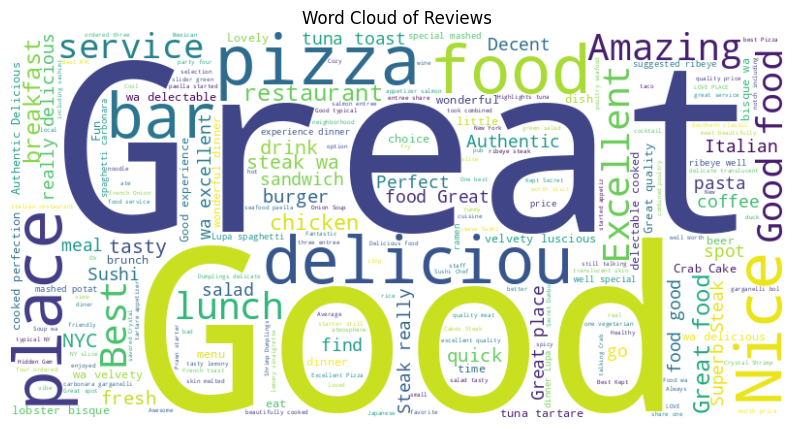

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all lemmatized reviews into a single string
all_reviews = ' '.join(df['Review Comment Lemmatized NoStopwords'].dropna().apply(' '.join))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Reviews')
plt.axis('off')
plt.show()

Word Frequency Plot

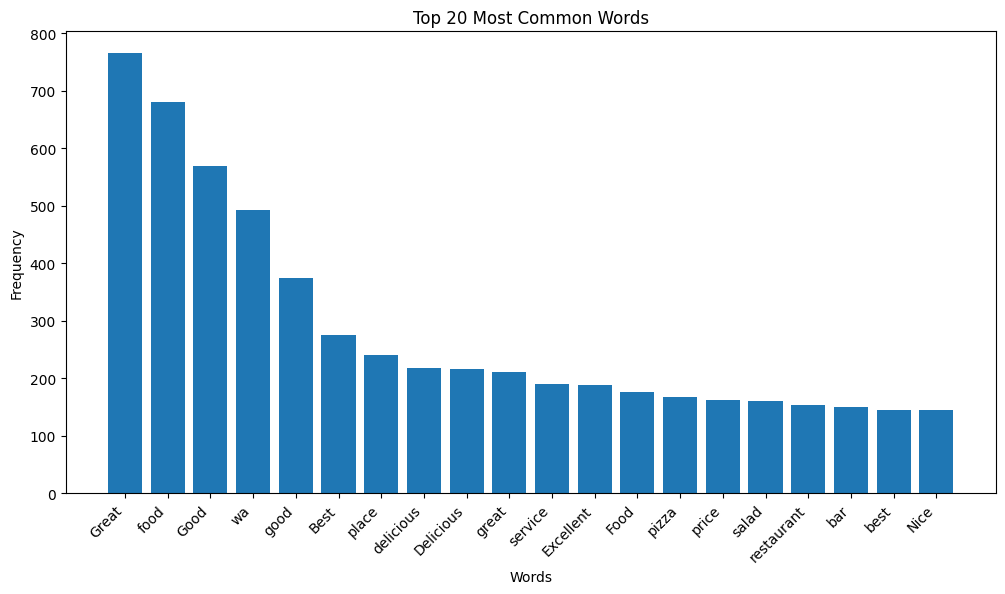

In [33]:
from collections import Counter

# Flatten the list of lemmatized reviews
all_tokens = [token for sublist in df['Review Comment Lemmatized NoStopwords'].dropna() for token in sublist]

# Calculate word frequencies
word_freq = Counter(all_tokens)

# Create a bar plot for the most common words
plt.figure(figsize=(12, 6))
most_common_words = word_freq.most_common(20)  # Get the top 20 most common words
words, frequencies = zip(*most_common_words)
plt.bar(words, frequencies)
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Sentiment Analysis with VADER

In [34]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [35]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores and classify sentiment based on compound score
def analyze_sentiment(text):
    # Get sentiment scores
    scores = sid.polarity_scores(text)

    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment, scores

# Apply sentiment analysis to the preprocessed text data
df['Vader Sentiment'], df['Sentiment Scores'] = zip(*df['Review Comment Cleaned'].apply(analyze_sentiment))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [36]:
df['Vader Sentiment'].value_counts()

Vader Sentiment
neutral     7582
negative    1973
positive     190
Name: count, dtype: int64

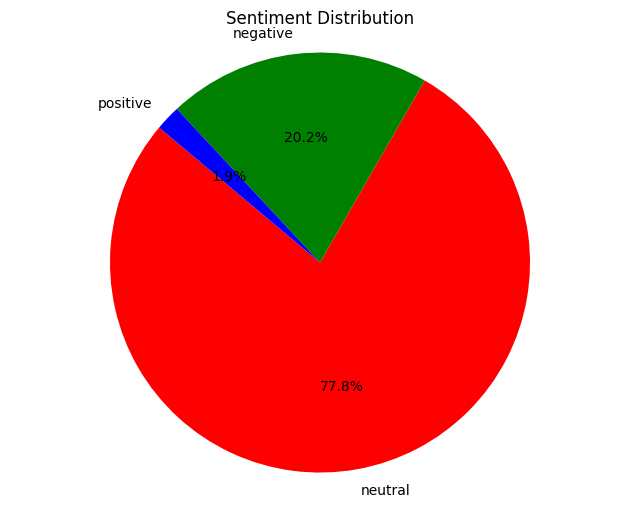

In [42]:
value_counts = df['Vader Sentiment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()


In [43]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Separate positive and negative reviews
positive_reviews = df[df['Vader Sentiment'] == 'positive']['Review Comment Cleaned']
negative_reviews = df[df['Vader Sentiment'] == 'negative']['Review Comment Cleaned']

# Tokenize positive and negative reviews
positive_tokens = [word_tokenize(review) for review in positive_reviews]
negative_tokens = [word_tokenize(review) for review in negative_reviews]

# Flatten the list of tokens
positive_words = [word for sublist in positive_tokens for word in sublist]
negative_words = [word for sublist in negative_tokens for word in sublist]

# Count the occurrences of each word
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Select the top N most frequent words or phrases
top_n_positive = positive_word_counts.most_common(10)
top_n_negative = negative_word_counts.most_common(10)

print("Top 10 most frequent words in positive reviews:")
print(top_n_positive)

print("\nTop 10 most frequent words in negative reviews:")
print(top_n_negative)


Top 10 most frequent words in positive reviews:
[('!', 190), ('Amazing', 56), ('Delicious', 22), ('Excellent', 17), ('Good', 11), ('Wow', 7), ('Outstanding', 6), ('Great', 5), ('Wonderful', 5), ('Fantastic', 4)]

Top 10 most frequent words in negative reviews:
[('No', 1961), ('Disappointing', 3), ('Meh', 2), ('Rudeness', 1), ('.', 1), ('Dumplings', 1), ('Deafening', 1), ('Terrible', 1), ('Avoid', 1), ('Scam', 1)]


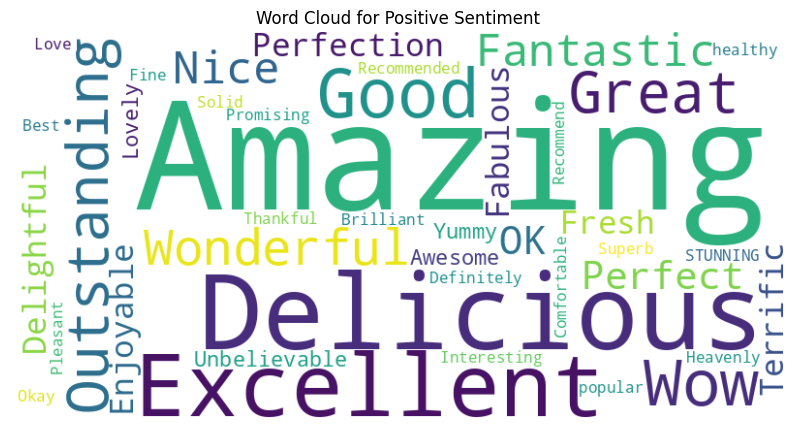

In [44]:
# Generate word cloud for positive sentiment
positive_df = df[df['Vader Sentiment'] == 'positive']
positive_text = ' '.join(positive_df['Review Comment Lemmatized NoStopwords'].dropna().apply(lambda x: ' '.join(x)))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the word cloud for positive sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

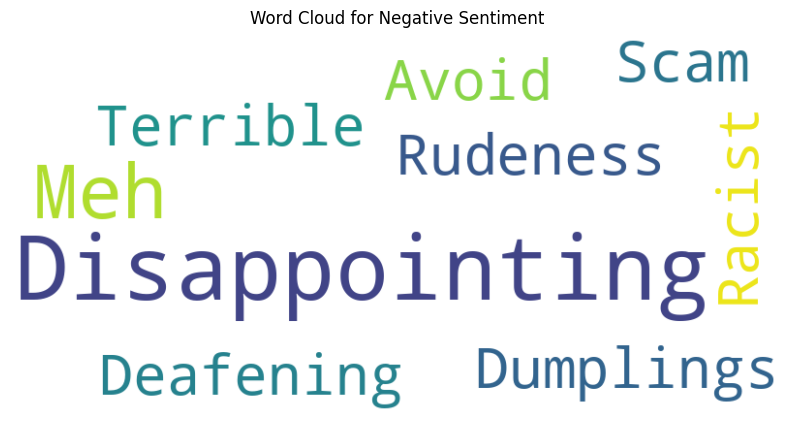

In [45]:
# Generate word cloud for negative sentiment
negative_df = df[df['Vader Sentiment'] == 'negative']
negative_text = ' '.join(negative_df['Review Comment Lemmatized NoStopwords'].dropna().apply(lambda x: ' '.join(x)))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word cloud for negative sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()

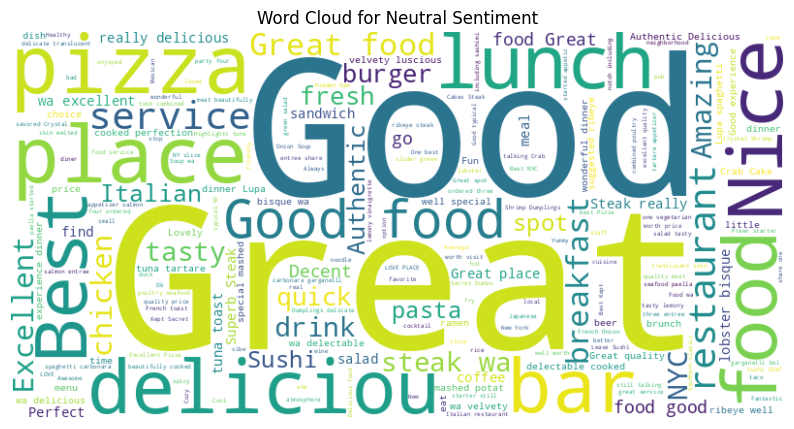

In [46]:
# Generate word cloud for neutral sentiment
neutral_df = df[df['Vader Sentiment'] == 'neutral']
neutral_text = ' '.join(neutral_df['Review Comment Lemmatized NoStopwords'].dropna().apply(lambda x: ' '.join(x)))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the word cloud for neutral sentiment
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')
plt.show()

In [47]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores and classify sentiment based on compound score
def analyze_sentiment(text):
    # Get sentiment scores
    scores = sid.polarity_scores(text)

    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment, scores

# Custom classifier to reassign sentiment based on specific words
def custom_classifier(review, vader_sentiment):
    positive_words = ["good", "great"]
    negative_words = ["bad", "terrible"]

    if vader_sentiment == 'neutral':
        for word in positive_words:
            if word in review.lower():
                return 'positive'
        for word in negative_words:
            if word in review.lower():
                return 'negative'
    return vader_sentiment

# Apply sentiment analysis to the preprocessed text data
df['Vader Sentiment'], df['Sentiment Scores'] = zip(*df['Review Comment Cleaned'].apply(analyze_sentiment))

# Apply custom classifier to adjust sentiments
df['Final Sentiment'] = df.apply(lambda row: custom_classifier(row['Review Comment Cleaned'], row['Vader Sentiment']), axis=1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
df['Final Sentiment'].value_counts()

Final Sentiment
neutral     5723
negative    2012
positive    2010
Name: count, dtype: int64

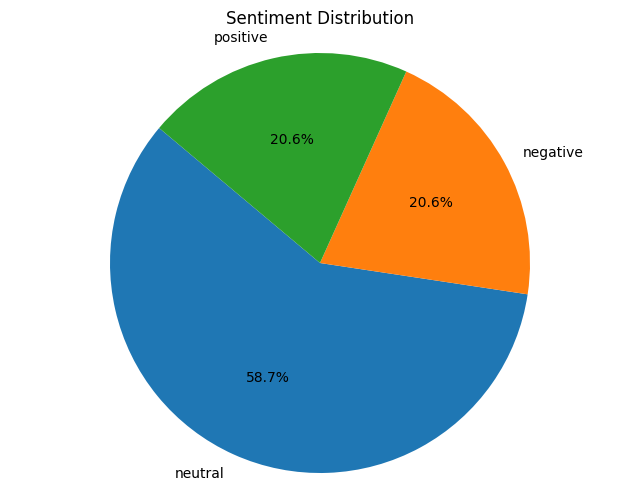

In [49]:
# Data
labels = df['Final Sentiment'].value_counts().index
sizes = df['Final Sentiment'].value_counts().values

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


After checking most frequent words in both positive and negative reviews, I did some concordance() method for some of these words, so I can see the context.

In [50]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

# Tokenize positive and negative reviews
positive_reviews = [word_tokenize(review) for review in df[df['Vader Sentiment'] == 'positive']['Review Comment Cleaned']]
negative_reviews = [word_tokenize(review) for review in df[df['Vader Sentiment'] == 'negative']['Review Comment Cleaned']]

# Flatten the list of tokens
all_positive_words = [word for sublist in positive_reviews for word in sublist]
all_negative_words = [word for sublist in negative_reviews for word in sublist]

# Create Text objects for positive and negative reviews
positive_text = Text(all_positive_words)
negative_text = Text(all_negative_words)

# Perform concordance for specific words in positive reviews
print("Concordance for word 'delicious' in positive reviews:")
positive_text.concordance("delicious")

# Perform concordance for specific words in negative reviews
print("\nConcordance for word 'disappointing' in negative reviews:")
negative_text.concordance("disappointing")


Concordance for word 'delicious' in positive reviews:
Displaying 23 of 23 matches:
Excellent Delicious Amazing ! ! ! Wow Perfection Excel
cellent ! Great Amazing ! ! ! Good Delicious Wonderful Wow . Great ! Great Deli
 Amazing ! ! ! Perfect Wonderful ! Delicious Outstanding Excellent Perfection A
Excellent Perfection Amazing ! ! ! Delicious Delicious ! Amazing Great ! Excell
Perfection Amazing ! ! ! Delicious Delicious ! Amazing Great ! Excellent ! Perf
Excellent ! Perfect ! Good Amazing Delicious Amazing ! ! ! Good Delicious Excel
azing Delicious Amazing ! ! ! Good Delicious Excellent Delicious ! Amazing ! ! 
ing ! ! ! Good Delicious Excellent Delicious ! Amazing ! ! ! Enjoyable Good Exc
lent Enjoyable Amazing ! ! ! WOW ! Delicious Excellent ! ! ! Definitely Fabulou
 ! Definitely Fabulous Comfortable Delicious Wow ! Good Nice Terrific Pleasant 
leasant Recommended OK Outstanding Delicious Delicious Delicious popular Good A
commended OK Outstanding Delicious Delicious Delicious popular

In [51]:
# Perform concordance for specific words in positive reviews
print("Concordance for word 'amazing' in positive reviews:")
positive_text.concordance("amazing")

# Perform concordance for specific words in negative reviews
print("\nConcordance for word 'meh' in negative reviews:")
negative_text.concordance("meh")


Concordance for word 'amazing' in positive reviews:
Displaying 25 of 57 matches:
Excellent Delicious Amazing ! ! ! Wow Perfection Excellent Exce
ection Excellent Excellent ! Superb Amazing ! ! ! Amazing Fantastic ! Wow ! Sol
nt Excellent ! Superb Amazing ! ! ! Amazing Fantastic ! Wow ! Solid STUNNING Ou
ing ! Excellent ! Excellent ! Great Amazing ! ! ! Good Delicious Wonderful Wow 
 ! Great Delightful Delightful Best Amazing ! ! ! Wonderful Amazing ! ! ! Perfe
ghtful Best Amazing ! ! ! Wonderful Amazing ! ! ! Perfect Wonderful ! Delicious
us Outstanding Excellent Perfection Amazing ! ! ! Delicious Delicious ! Amazing
Amazing ! ! ! Delicious Delicious ! Amazing Great ! Excellent ! Perfect ! Good 
 Great ! Excellent ! Perfect ! Good Amazing Delicious Amazing ! ! ! Good Delici
 ! Perfect ! Good Amazing Delicious Amazing ! ! ! Good Delicious Excellent Deli
ood Delicious Excellent Delicious ! Amazing ! ! ! Enjoyable Good Excellent Enjo
 Enjoyable Good Excellent Enjoyable Amazing ! ! ! WOW !

In [52]:
# Perform concordance for specific words in positive reviews
print("Concordance for word 'rudeness' in positive reviews:")
positive_text.concordance("excellent")

# Perform concordance for specific words in negative reviews
print("\nConcordance for word 'rudeness' in negative reviews:")
negative_text.concordance("rudeness")


Concordance for word 'rudeness' in positive reviews:
Displaying 18 of 18 matches:
 Excellent Delicious Amazing ! ! ! Wow Perfec
cious Amazing ! ! ! Wow Perfection Excellent Excellent ! Superb Amazing ! ! ! A
ing ! ! ! Wow Perfection Excellent Excellent ! Superb Amazing ! ! ! Amazing Fan
Wow ! Solid STUNNING Outstanding ! Excellent ! Excellent ! Great Amazing ! ! ! 
STUNNING Outstanding ! Excellent ! Excellent ! Great Amazing ! ! ! Good Delicio
 Wonderful ! Delicious Outstanding Excellent Perfection Amazing ! ! ! Delicious
icious Delicious ! Amazing Great ! Excellent ! Perfect ! Good Amazing Delicious
cious Amazing ! ! ! Good Delicious Excellent Delicious ! Amazing ! ! ! Enjoyabl
ous ! Amazing ! ! ! Enjoyable Good Excellent Enjoyable Amazing ! ! ! WOW ! Deli
able Amazing ! ! ! WOW ! Delicious Excellent ! ! ! Definitely Fabulous Comforta
ng ! ! ! Brilliant ! Amazing ! ! ! Excellent ! Amazing Amazing ! ! ! Unbelievab
ING ! Wonderful Amazing ! ! ! Good excellent Wow UNBELIEVABLE Awesome De

In [53]:
# Perform concordance for specific words in positive reviews
print("Concordance for word 'great' in positive reviews:")
positive_text.concordance("delicious")

# Perform concordance for specific words in negative reviews
print("\nConcordance for word 'terrible' in negative reviews:")
negative_text.concordance("disappointing")


Concordance for word 'great' in positive reviews:
Displaying 23 of 23 matches:
Excellent Delicious Amazing ! ! ! Wow Perfection Excel
cellent ! Great Amazing ! ! ! Good Delicious Wonderful Wow . Great ! Great Deli
 Amazing ! ! ! Perfect Wonderful ! Delicious Outstanding Excellent Perfection A
Excellent Perfection Amazing ! ! ! Delicious Delicious ! Amazing Great ! Excell
Perfection Amazing ! ! ! Delicious Delicious ! Amazing Great ! Excellent ! Perf
Excellent ! Perfect ! Good Amazing Delicious Amazing ! ! ! Good Delicious Excel
azing Delicious Amazing ! ! ! Good Delicious Excellent Delicious ! Amazing ! ! 
ing ! ! ! Good Delicious Excellent Delicious ! Amazing ! ! ! Enjoyable Good Exc
lent Enjoyable Amazing ! ! ! WOW ! Delicious Excellent ! ! ! Definitely Fabulou
 ! Definitely Fabulous Comfortable Delicious Wow ! Good Nice Terrific Pleasant 
leasant Recommended OK Outstanding Delicious Delicious Delicious popular Good A
commended OK Outstanding Delicious Delicious Delicious popular Goo

After these analyses, we can see that the most frequent words are mostly repetitive and that those few comments contain almost all of the negative words extracted. So, I would like to check what are other negative words besides these words.

In [54]:
# Convert all negative words to lowercase before filtering
all_negative_words_lower = [word.lower() for word in all_negative_words]

# Filter out common negative words from negative reviews
filtered_negative_words = [word for word in all_negative_words_lower if word not in ['no', 'disappointing', 'terrible', 'meh', 'rudeness', 'avoid', 'scam']]

# Perform frequency analysis on filtered negative words
negative_freq_dist = nltk.FreqDist(filtered_negative_words)

# Display the top 10 most frequent words in filtered negative reviews
print("Top 10 most frequent words in negative reviews after filtering:")
print(negative_freq_dist.most_common(10))


Top 10 most frequent words in negative reviews after filtering:
[('.', 1), ('dumplings', 1), ('deafening', 1), ('racist', 1)]


MACHINE LEARNING ALGORITHMS

Preparing the text data and represent it numerically using TF-IDF (Term Frequency-Inverse Document Frequency)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example text data from DataFrame
text_data_df = df['Review Comment Cleaned'].tolist()

# Corresponding labels from DataFrame
labels_df = df['Final Sentiment'].tolist()

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data to numerical features
X_tfidf_df = tfidf_vectorizer.fit_transform(text_data_df)

# Check the shape of the transformed data
print("Shape of transformed data:", X_tfidf_df.shape)


Shape of transformed data: (9745, 1000)


In [56]:
# Print feature names (words)
print("Feature names (words):", tfidf_vectorizer.get_feature_names_out())

Feature names (words): ['00' '1stclass' 'absolutelyamazing' 'affordable' 'amazing'
 'amazingexperience' 'amazingfind' 'amazingfood' 'amazinghappyhour'
 'amust' 'amustvisit' 'an' 'and' 'anddon' 'andit' 'andmeatballs'
 'anitalianrestaurantwellworthavisit' 'aplaceforlunch' 'authentic'
 'authenticexperience' 'authenticfood' 'authenticmexicanfood'
 'authenticramen' 'average' 'averagefood' 'awesome' 'awesomeburgers'
 'awesomestaff' 'awfulservice' 'badexperience' 'bagels' 'bar' 'basket'
 'beautifullycookedand' 'beautifulsteak' 'best' 'bestbarinnyc'
 'bestcocktails' 'bestkeptsecretindumbo' 'bestoystersinmylife'
 'bestpaellaoutsideofspain' 'bestwings' 'breakfast' 'brunch' 'bubblicious'
 'busyplace' 'calamari' 'can' 'cantwaittogoback' 'cheap' 'cheesecake'
 'chicken' 'christmasdaydinner' 'clean' 'closetomaddisonsquaregarden'
 'comfortfood' 'consistentlygood' 'convenient' 'coolatmosphere'
 'coolplace' 'couldn' 'cozy' 'cozybar' 'crabcakesandthesteak'
 'crispychicken' 'cutespot' 'decent' 'decentfood

In [57]:
# Print TF-IDF matrix
print("TF-IDF matrix:")
print(X_tfidf_df.toarray())

TF-IDF matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 80%, 20%
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, labels_df, test_size=0.2, random_state=42)


Support Vector Machine (SVM) algorithm

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')  # You can specify different kernels like 'linear', 'rbf', etc.

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict sentiment labels for the testing data
svm_predictions = svm_classifier.predict(X_test)

# Evaluate performance
svm_report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:")
print(svm_report)

SVM Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.98      0.99       387
     neutral       0.80      1.00      0.88      1130
    positive       0.97      0.34      0.51       432

    accuracy                           0.85      1949
   macro avg       0.92      0.77      0.79      1949
weighted avg       0.87      0.85      0.82      1949



Naive Bayes algorithm

In [60]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the Naive Bayes classifier on the training data
nb_classifier.fit(X_train, y_train)

# Predict sentiment labels for the testing data
nb_predictions = nb_classifier.predict(X_test)

# Evaluate performance
nb_report = classification_report(y_test, nb_predictions)
print("Naive Bayes Classification Report:")
print(nb_report)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.98      0.99       387
     neutral       0.79      0.99      0.88      1130
    positive       0.96      0.34      0.51       432

    accuracy                           0.85      1949
   macro avg       0.92      0.77      0.79      1949
weighted avg       0.87      0.85      0.82      1949



In [61]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Naive Bayes classifier
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)

# Compute confusion matrix for SVM classifier
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Print confusion matrix for Naive Bayes classifier
print("Confusion Matrix - Naive Bayes Classifier:")
print(conf_matrix_nb)

# Print confusion matrix for SVM classifier
print("\nConfusion Matrix - SVM Classifier:")
print(conf_matrix_svm)


Confusion Matrix - Naive Bayes Classifier:
[[ 380    7    0]
 [   0 1124    6]
 [   0  284  148]]

Confusion Matrix - SVM Classifier:
[[ 381    6    0]
 [   0 1125    5]
 [   0  284  148]]


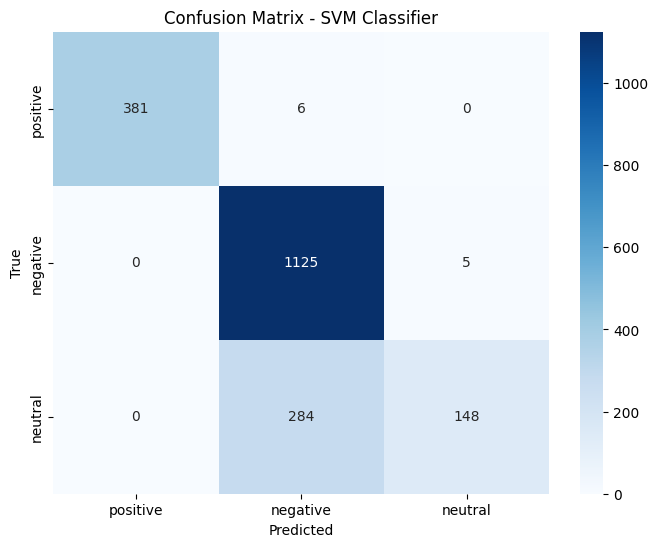

In [62]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

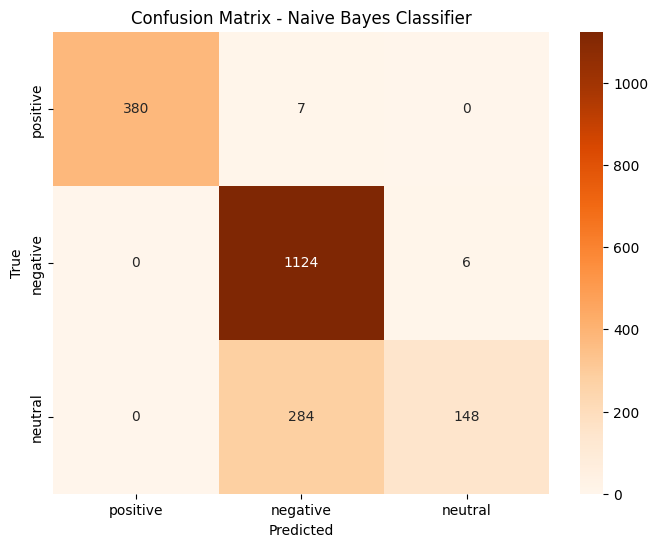

In [63]:
# Compute confusion matrix for Naive Bayes classifier
conf_matrix_nb = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix as heatmap for Naive Bayes classifier with a different color
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Oranges", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
